In [120]:
import numpy as np
import pandas as pd
# Plot a scatter plot chart
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [121]:
ex1data2=pd.read_csv("ex1data2.csv",usecols=["size","rooms","price"])
ex1data2.head()

,size,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [122]:
ex1data2.describe()

,size,rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


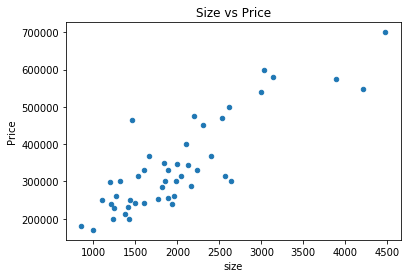

In [123]:
ex1data2.plot(kind='scatter', title='Size vs Price', x='size', y='price')
plt.xlabel('size')
plt.ylabel('Price')
plt.show()

In [124]:
sizeMean=ex1data2["size"].mean()
roomsMean=ex1data2["rooms"].mean()

In [125]:
X = ex1data2.iloc[:,0:2] # read first two columns into X
y = ex1data2.iloc[:,2] # read the third column into y
m = len(y) # no. of training samples

In [126]:
X.head()

,size,rooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [127]:
featuresMean=np.mean(X)
featuresStd=np.std(X)
print(featuresMean,featuresStd)

size     2000.680851
rooms       3.170213
dtype: float64 size     786.202619
rooms      0.752843
dtype: float64


In [128]:
X = (X - np.mean(X))/np.std(X)

In [129]:
Y = y[:,np.newaxis]
theta = np.zeros([3,1])
iterations = 10000
alpha = 0.1
ones = np.ones((m,1))
X = np.hstack((ones, X)) # adding the intercept term
X

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

In [130]:
def computeCost(X,Y,theta,m):
    """
    Take in a numpy array X,Y, theta and generate the cost function     of using theta as parameter in a linear regression model
    """
    temp=((np.dot(X,theta))-Y)**2
    return ((np.sum(temp))/(2*m))
computeCost(X,Y,theta,m)

65591548106.45744

In [131]:
def gradientDescent(X, Y, theta, alpha, iterations, m):
    for i in range(iterations):
        cost=computeCost(X,Y,theta,m)
        debugIter.append(i)
        debugCost.append(cost)
        temp = np.dot(X, theta) - Y
        temp = np.dot(X.T, temp)    #so whats happening here is in temp 0 row stores for thetaO w.r.t derivative and 1th row w.r.t to theta 1 derivative
        theta = theta - (alpha/m) * temp
    return theta
print(theta)
debugIter=list()
debugCost=list()
theta=gradientDescent(X, Y, theta, alpha, iterations,m)
computeCost(X,Y,theta,m)

[[0.]
 [0.]
 [0.]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """


nan

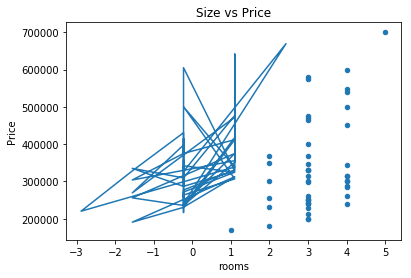

In [106]:
ex1data2.plot(kind='scatter', title='Size vs Price', x='rooms', y='price')
plt.xlabel('rooms')
plt.ylabel('Price')
plt.plot(X[:,2], np.dot(X, theta))
plt.show()

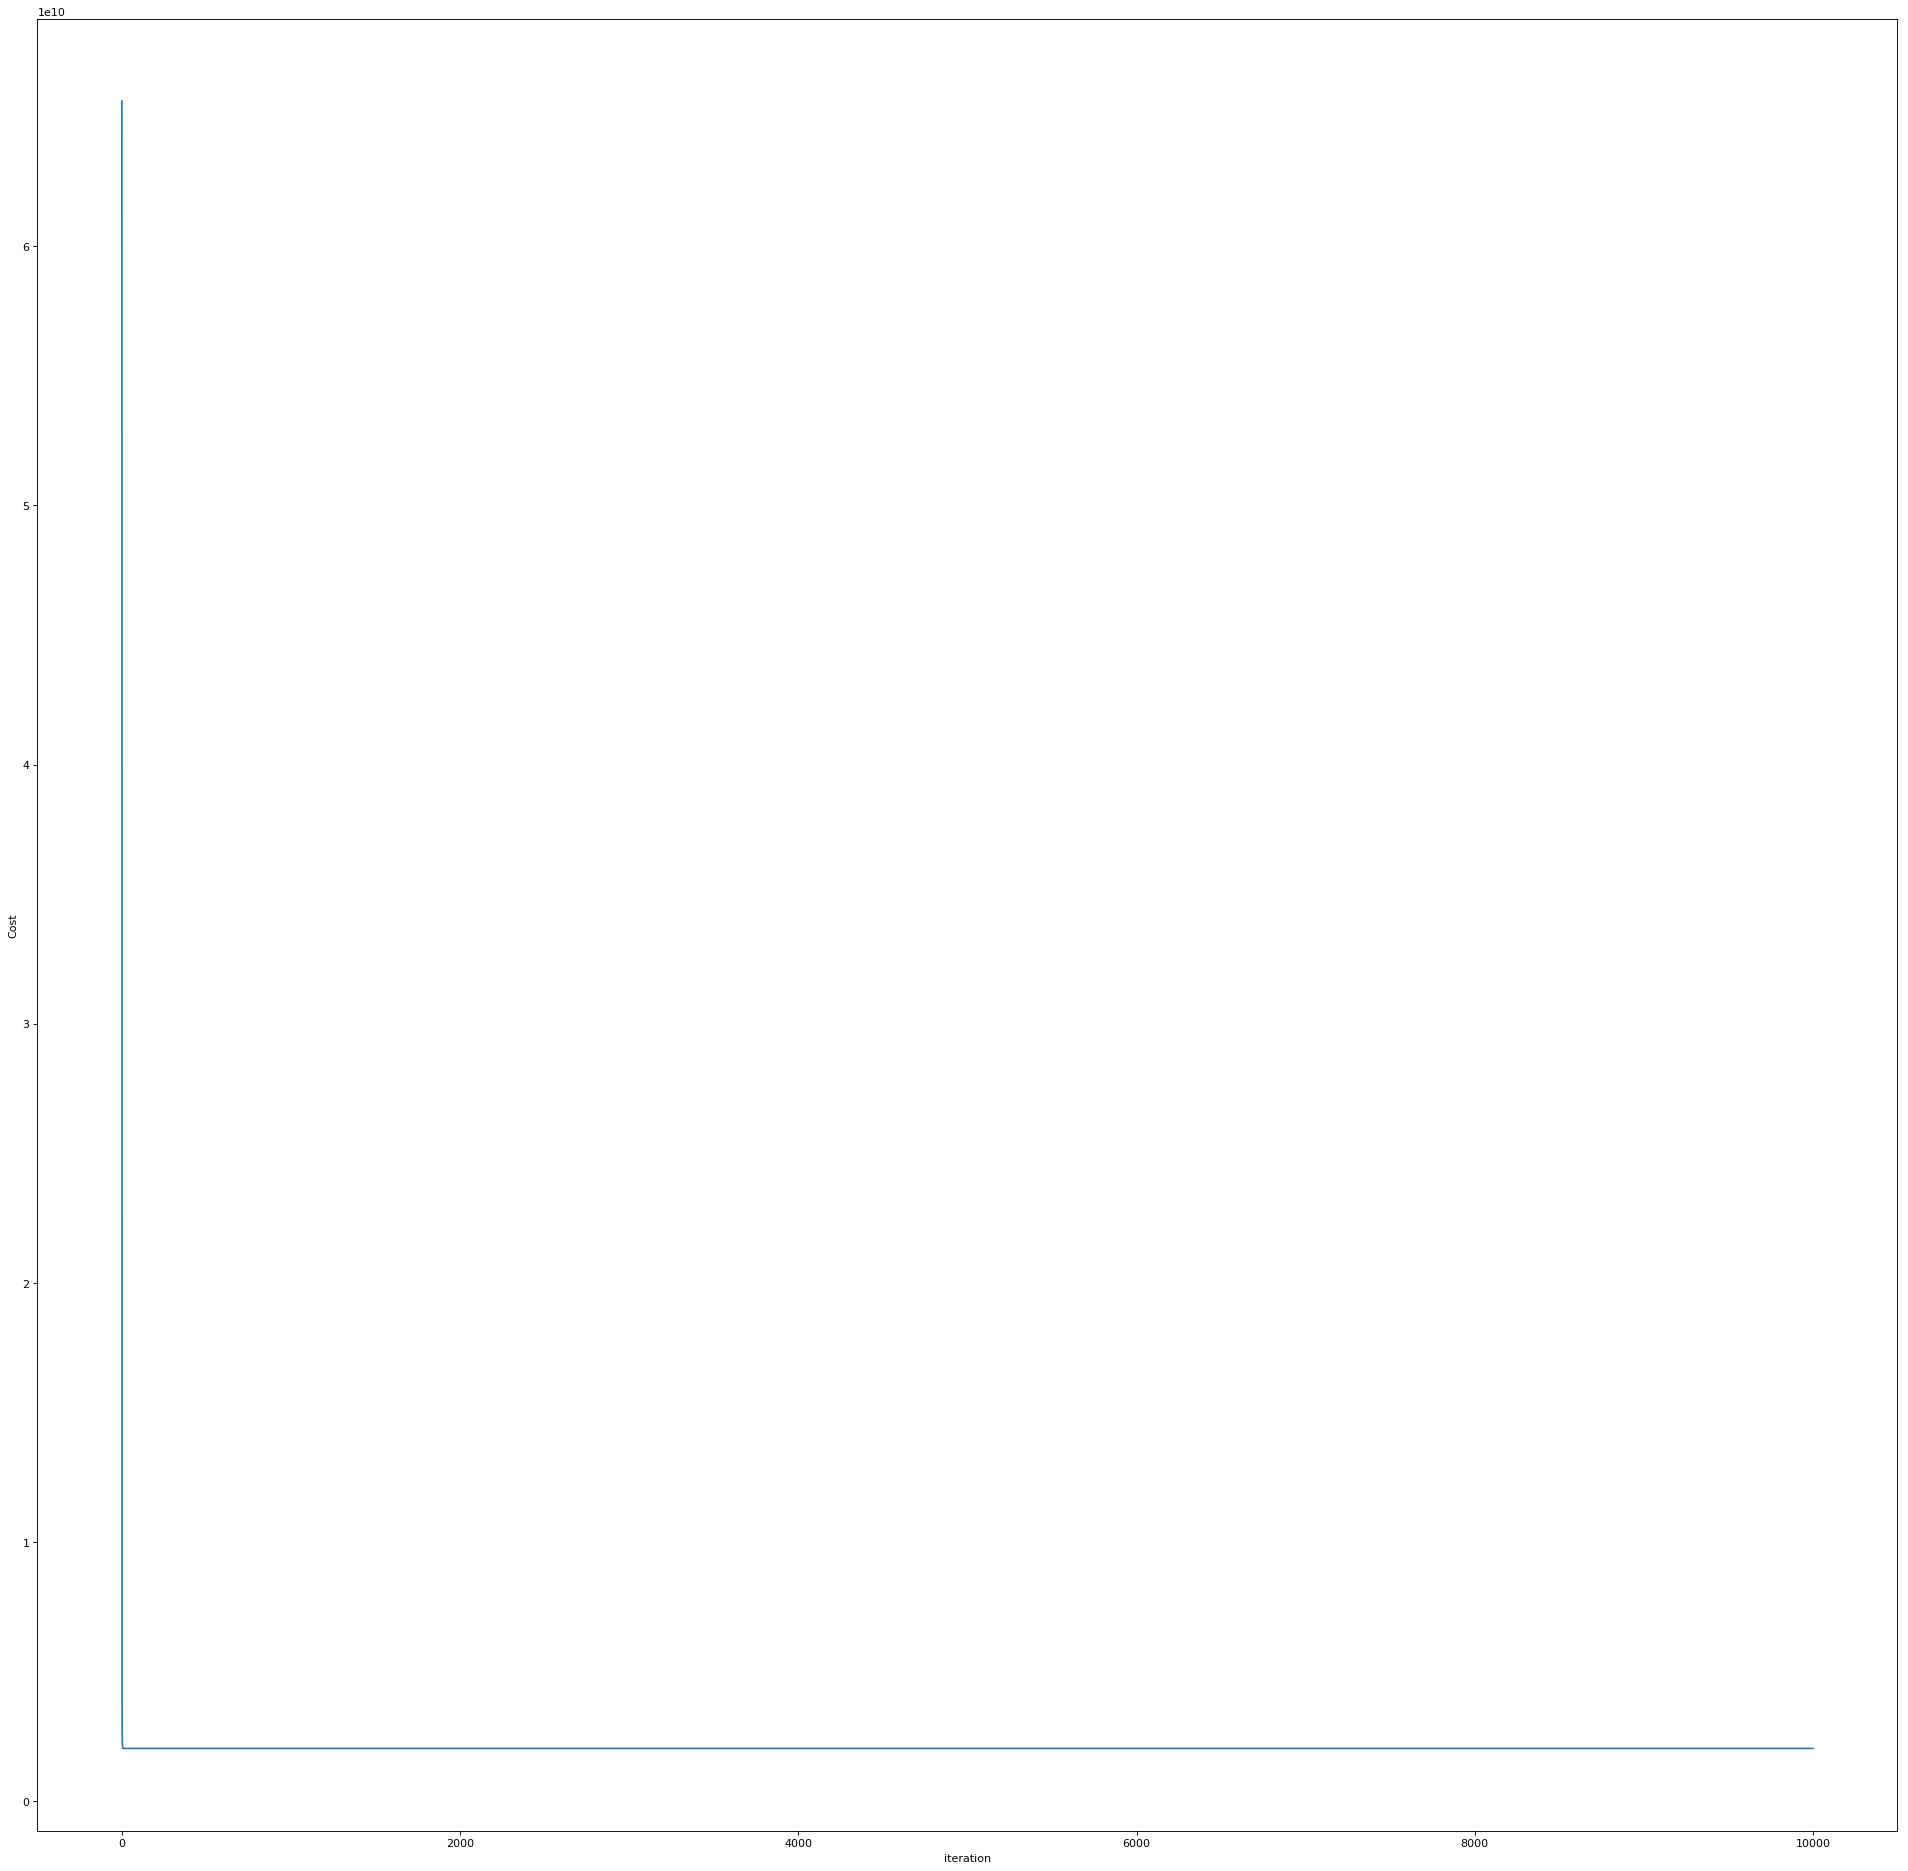

In [107]:
from matplotlib.pyplot import figure
figure( figsize=(30, 30), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('iteration')
plt.ylabel('Cost')
plt.plot(debugIter,debugCost)
plt.show()